<center>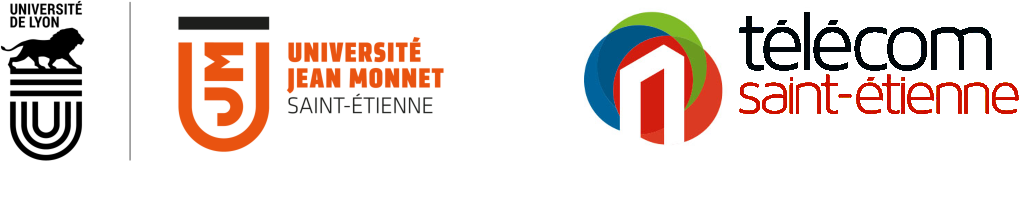</center>

<br>
<center><span style="font-size:35px"><b>Statistical Inference</b></span></center>

<center><span style="font-size:25px"><b>Chap 5: Normality Tests</b></span></center>

# 1. Reminders and Tools for Visualizing Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCICE.** Generate n=30 samples following a normal distribution with mean mu=0 and standard devitation sigma=0.1

## 1.1 Frequency distribution
> **<i class="fa fa-solid fa-book"></i>**  The **frequency** of a particular value is the number of times the value occurs in the data. Hence, the **frequency distribution** reports the frequencies (or counts) of values of the data occuring in certains intervals of values (or bins). There exist multiple ways of depicting the frequency distribution. Hereafter, we consider the histogram!
>
>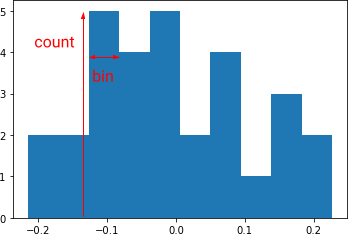

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCICE.** Plot the frequency histogram by using *hist* from the pyplot librairy

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCICE.** Repeat the same exercice but first extract the couple (counts,bins) by using the function *histogram* from NumPy

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCICE.** Display the frequency distribution with different number of bins. What do you observe? What is the *best* number of bins?

## 1.2. Probability Distribution (Relative Frequency Distribution)

> **<i class="fa fa-solid fa-book"></i>**  The **empirical probability** (or *relative frequency*) of a value is the 
frequency (or count) of this particular value divided by the total number of frequencies (sum of counts). In statistical terms, the empirical probability is an estimate or estimator of a probability.
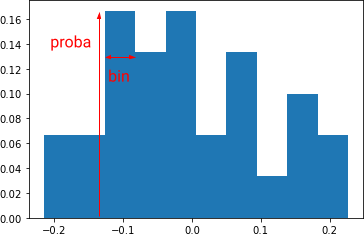

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCICE.** Compute and plot the empirical probability distribution

## 1.3. Probability Density Function (PDF)
> **<i class="fa fa-solid fa-book"></i>**  The **probability density** is the probability per unit length. In our case, the unit length is the <u>bin width</u>. The PDF is useful in order to get the probability of being in an interval. To do so, you only need to integrate the probability density between the two endpoints of the interval. Note that the probability density may be greater than 1 if the bin width is very small.
>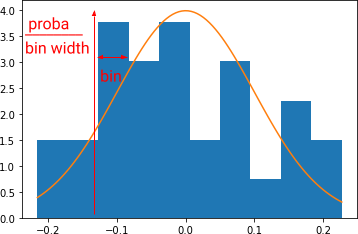
>
> The PDF of the normal distribution $\mathcal{N}(\mu,\sigma^2)$ reads: $$\frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2}$$

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCICE.** Compute the width of the bins by using the function *np.diff*

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCICE.** Compute and plot the empirical probability density distribution by using *hist* from PyPlot

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCICE.** Plot the empirical probability density distribution function (pdf) directly by using *hist* from PyPlot (check the optional arguments). Compare with your distribution computed by hand. In addition, compute and plot the theoretical pdf 1) computed by applying the formula and 2) by using scipy.stats

## 1.4. Cumulative Distribution Function (CDF)

> **<i class="fa fa-solid fa-book"></i>**  The **cumulative distribution function** (fr: *fonction de répartition*) of a real-valued random variable $X$ evaluated at $x$, is the probability that $X$ will take a value less than or equal to $x$. Mathematically, $F(x)=\mathbb{P}(X\leq x)$ is the <u>cumulative sum of probabilities</u> from $-\infty$ to $x$.
>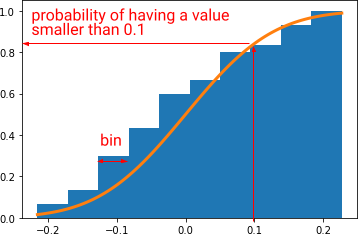
>
> The CDF of the normal distribution $\mathcal{N}(\mu,\sigma^2)$ reads: $$F(x)=\frac{1}{2}\left[1 + \operatorname{erf}\left( \frac{x-\mu}{\sigma\sqrt{2}}\right)\right]$$

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCICE.** Compute the empirical cumulative distribution by using *np.cumsum*. Then, display the empirical cdf with pyplot.stairs and compare with the theoretical cdf (either computed by hand or by resorting to scipy.stats.norm)

## 1.5. Quantile Function / Percentile Function / Percent Point Function (PPF)

> **<i class="fa fa-solid fa-book"></i>**  The **percent point function** (fr: *fonction quantile*) specifies the value of the random variable $X$ such that the probability of the variable being less than or equal to that value $x$ equals the given probability $p$. It is denoted $Q$ and corresponds to the inverse of the CDF, that is $Q(p)=F^{-1}(p)$ for some probability $p\in[0,1]$.
>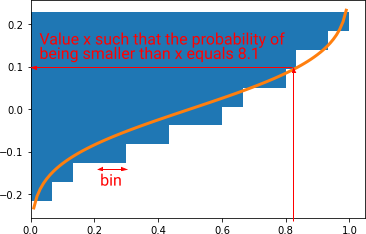
>
> The PPF of the normal distribution $\mathcal{N}(\mu,\sigma^2)$ reads: $$Q(p)=\mu + \sigma\sqrt{2}  \operatorname{erf}^{-1}(2p-1)$$

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCICE.** Display the empirical PPF by plotting the empirical CDF in "horizontal" (*hint: use the option orientation in plt.stairs*). Then, add the theoretical PPF by using stats.norm.

# 2. Probability Plots

> **<i class="fa fa-solid fa-book"></i>** **Probability plots** are graphical techniques for comparing two datasets. They come particularly handy to grasp whether one dataset may follow a given distribution or not. 
>
>- Henry Line: Plots normal fractiles vs. data values
>- P-P Plot: Plots empirical probabilies vs. theoretical probabilities
>- Q-Q Plot: Plots empirical quantiles vs. theoretical quantiles
>
>
> All methods amount in plotting scatter points (computed from the data) and comparing them to a reference line (computed from the suppposed theoretical distribution). If the scatter points are close to the reference line, we can say that the dataset follows the given distribution.


### 2.1. Henry Line
> **<i class="fa fa-solid fa-book"></i>** **Henry lines** are a useful graphical method to assess if some data follows a normal distribution with unknown parameters. As such, it is also known under the name *Normal probability plot*.
>
>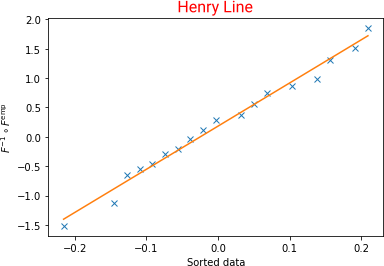
> <table border="0">
> <tr>
    >     <td><center><b>Scatter Points</b></center></td>
>  </tr>
>  <tr>
>     <td align ="left">x-axis: sorted data<br>y-axis: empirical fractiles</td>
>  </tr>
> </table>
>
> Suppose $X\sim\mathcal{N}(0,1)$
>> Then, for every value $x_i$, we have that $\mathbb{P}\left(X\leq x_i \right) = F(x_i)$, where $F$ is the theoretical CDF of the standard normal distribution
>
> One way to check if $X\sim\mathcal{N}(0,1)$, is to compare:
>> $$\begin{aligned}\Big(x_i, F^{\rm emp}(x_i) \Big)\quad &\text{vs.}\quad \Big( x_i, F(x_i)\Big) \\
\Big(x_i, F^{-1}\left(F^{\rm emp}(x_i)\right)\Big)\quad &\text{vs.}\quad (x_i, x_i)
\end{aligned}$$
>> where $F^{-1}$ is the theoretical PPF of the <u>standard </u> normal distribution and $F^{\rm emp}$ is the empirical CDF
>
> If you suspect that $X\sim\mathcal{N}(\mu,\sigma^2)$, the same previous steps will end up in
>> $$\Big(x_i, F^{-1}\left(F^{\rm emp}(x_i)\right)\Big) \quad\text{vs.}\quad (x_i, \frac{x_i-\mu}{\sigma})$$
>
> Hence if you don't know the parameters $(\mu,\sigma)$, you can estimate them by:
> 1. Performing a linear regression of $(x_i, F^{-1}\left(F^{\rm emp}(x_i)\right)$ as $(x_i, a x_i + b)$ with slope $a$ and offset $b$
> 2. Comparing $a x_i+b$ with $\frac{x_i-\mu}{\sigma}$:
>    - $a=1/\sigma \Leftrightarrow \sigma = 1/a$
>    - $(x_i-\mu)\sigma=0 \Leftrightarrow x_i=\mu$ and $a x_i+b = 0 \Leftrightarrow x_i=-b/a$. Hence $\mu=-b/a$

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCICE.** Create an array called *data_sorted* containing the original data sorted in ascending order. In order to avoid numerical errors in the following, omit the largest value in *data_sorted*.

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCICE.** Compute the empirical CDF $F^{\rm emp}$ from *data_sorted* <u>with as many number of bins as data</u>. Be careful to divide by the total number of values in the data (which contains one more value than in data_sorted).

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCICE.** By using the inverse cdf (also called percentile function or ppf as a shorthand for percent-point function), compute what would be the true fractiles of the normal distribution from the observed cdf, that is $F^{-1}(F^{\rm emp})$

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCICE.** Plot the computed fractiles from the normal distribution as a function of the observed data: $(x_i, F^{-1}(F^{\rm emp}(x_i))$.

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCICE.** If the observed data follows a normal distribution, most of the points should form a straight line. Use *scipy.stats.linregress* to fit your data with a line (linear regression will be studied in the *Algorithms for data analysis course*). Display the result.

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCICE.** Compute the parameters (mean,sigma) of the normal distribution by using the parameters of the linear fit

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCICE (optional).** Re-do all the previous steps but instead of using the data, use a .. binned version)

### 2.2. P-P plot
> **<i class="fa fa-solid fa-book"></i>** The **P-P (probability–probability) plot** is a visualization that plots CDFs of two distributions (for example empirical and theoretical) against each other.
>
> 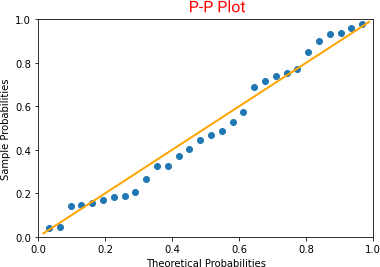
>
> <table border="0">
> <tr>
    >     <td><center><b>Scatter Points</b></center></td>
    >     <td><center><b>Reference Line</b></center></td>
>  </tr>
>  <tr>
>     <td align ="left">x-axis: theoretical values of the CDF<br>y-axis: empirical values of the CDF</td>
>     <td align ="left">x-axis: theoretical values of the CDF<br>y-axis: theoretical values of the CDF</td>
>  </tr>
> </table>
>
>- Each point z on the plot indicates what percentage of data lies at or below z in both distributions.
>- To compare the distributions we check if the points lie on a 45-degree line (x=y). In case they deviate, the distributions differ.
>- P-P plots are <ins>well suited to compare regions of high probability density (center of distribution)</ins> because in these regions the empirical and theoretical CDFs change more rapidly than in regions of low probability density.
>- P-P plots require fully specified distributions, so if we are using Gaussian as the theoretical distribution we should specify the location and scale parameters.

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCICE.** Create an array, called *theoretical_cdf*, consisting of the values of the theoretical CDF computed at each bins (except the last one)

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCICE.** Draw the P-P plot with the previously computed empirical and theoretical CDFs. Add the reference line (theoretical vs. theoretical).

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCICE.** Same question by using *ProbPlot/ppplot* from the library StatsModel

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCICE (optional).** You might observe that your homemade P-P plot is different from the one computed through StatsModel. In order to get the same plot, you need to recompute the CDFs (empirical and theoretical) by choosing a bin width such that each bin contain at most one value. (*hint: the bin width should be chosen according to the smallest difference between two consecute values of your sorted data*)

### 2.3. Quantile-Quantile Plot
> **<i class="fa fa-solid fa-book"></i>** The **Q-Q (Quantile-Quantile) plot**  is another graphic method which display the quantiles of two distributions (for example empirical and theoretical) against each other.
>
>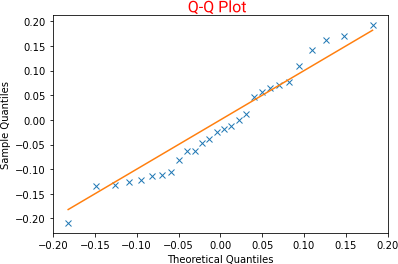
> <table border="0">
> <tr>
    >     <td><center><b>Scatter Points</b></center></td>
    >     <td><center><b>Reference Line</b></center></td>
>  </tr>
>  <tr>
>     <td align ="left">x-axis: theoretical quantiles<br>y-axis: empirical quantiles</td>
>     <td align ="left">x-axis: theoretical quantiles<br>y-axis: theoretical quantiles</td>
>  </tr>
> </table>
>
>- Each point on the chart corresponds to a certain quantile coming from both distributions (again in most cases empirical and theoretical).
>- On a Q-Q plot, the reference line is dependent on the location and scale parameters of the theoretical distribution. The intercept and slope are equal to the location and scale parameters respectively.
>- A linear pattern in the points indicates that the given family of distributions reasonably describes the empirical data distribution.
>- Q-Q plot gets <ins>very good resolution at the tails of the distribution</ins> but worse in the center (where probability density is high)
>- Q-Q plots do not require specifying the location and scale parameters of the theoretical distribution, because the theoretical quantiles are computed from a standard distribution within the specified family
>
>**Reminder.** Let $F$ be the CDF, i.e., $x\mapsto F(x)=\mathbb{P}(X\leq x)$. Then, the quantile of order $\alpha$ is $\alpha\mapsto F^{-1}(\alpha)$. In other words, it is the value of $x$ such that $F(x)=\alpha$.

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCICE.** Compute by hand the quantiles of the data from by inverting the empirical CDF

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCICE.** Compute the quantiles by using the function *quantile* from NumPy. Compare with your results.

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCICE.** Compute the quantiles of the theoretical normal distribution by using scipy.stats

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCICE.** Display the Q-Q Plot (empirical quantiles vs. theoretical quantiles). Add the reference line

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCICE.** Same exercice by using *qqplot* from the librairy statsmodel to check if the distribution follows a normal distribution with parameter (mu,sigma). Add the reference line.

# 3. Statistical Tests

In this section, we consider statistical tests to decide among the two following hypotheses

$\begin{cases} H_0 \text{: the statistical trait follows a normal distribution}\\
H_1 \text{: the statistical trait does not follow a normal distribution}\end{cases}$

## 3.1. Kolmogorov-Smirnov Test


The Kolmogorov–Smirnov statistic for a given cumulative distribution function F is

$$D_n= \sup_x |F_n(x)-F(x)| = \sup_{0 \leq t \leq 1} |F_n(F^{-1}(t)) - F(F^{-1}(t))| \sim \mathcal{D}$$

Intuitively, the statistic takes the largest absolute difference between the two CDF (empirical and theoretical) across all ''x'' values. The resulting test statistic $D_n$ should then be compared with the critical value corresponding to some given $\alpha$-risk inside the table of the Kolmogorov distribution $\mathcal{D}$. 


In practice, the statistic requires a relatively large number of data points (in comparison to other goodness of fit criteria) to properly reject the null hypothesis.

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCICE.** Display both the empirical cdf and the theoretical cdf. However, contrary to Section 1.4, only compute the theoretical cdf at the mid-point of each bin

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCICE.** Compute the observed Kolmogorov-Smirnov statistics. Reminder: it is the largest absolute difference between the empirical and theoretical cdf

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCICE (optional).** Actually, the bins (and location at which we compute the cdf) impacts greatly the results. In order to illustrate this, repeat the previous question by computing the theoretical cdf on bins[1:] and bins[:-1]. Average and print the observed KS-statistics

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCICE.** Compute the KS-statistics by using scipy.stats module (note that it also returns the p-value). Comment.

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCICE.** What is the conclusion of the statistical test? Explain your reasoning

## 3.2. Shapiro-Wilk Test

The Shapiro-Wilk test is a nonparametric approach for testing whether a continuous variable X follows a normal distribution.

$$W = {\left(\sum \limits_{i=1}^n a_i x_{(i)}\right)^2 \over \sum \limits_{i=1}^n (x_i-\overline{x})^2}\sim\mathcal{W}$$

where $x_{(i)}$ is the ''i''th-smallest number in the sample (not to be confused with $x_i$), $\overline{x}$ is the sample mean, and the $a_i$'s are tabulated coefficients which can be found in the original paper. The distribution $\mathcal{W}$ does not have a name and is computed numerically.

**Quick history:**
- 1965: Samuel Sanford Shapiro and Martin Bradbury Wilk published the first version of the test which could only be applied to sample sizes comprising between 3 and 50 observations.
- 1972: The work of Shapiro and Francia made it possible to extend this constraint to samples of less than 100.
- 1982: Thanks to P. Royston, the test became usable on larger sizes comprising between 3 and 2,000 samples.
- 1997: M. Mahibbur Rahman and Z. Govindarajulu push the limit to 5000.
- 1999: Conover proposes the following variant additionnally involving $x_{(n-i+1)}$ the ''i''-the largest value along with $x_{(i)}$ the ''i''-th smallest value.


$$W = {\left(\sum \limits_{i=1}^n \tilde{a}_i (x_{(n-i+1)} - x_{(i)})\right)^2 \over \sum \limits_{i=1}^n (x_i-\overline{x})^2}$$


 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCICE.** Compute the test statistic and p-value resulting from the Shapiro-Wilk test by using scipy.stats (note that it uses P. Royston algorithm). Comment.

#  <i class="fa fa-solid fa-book"></i> References and To Go Further

**Articles**
- Shapiro, S. S., & Wilk, M. B. (1965). An Analysis of Variance Test for Normality (Complete Samples). Biometrika, 52(3/4), 591–611. https://doi.org/10.2307/2333709
- Royston, P. (1995). Remark AS R94: A Remark on Algorithm AS 181: The W-test for Normality. Journal of the Royal Statistical Society. Series C (Applied Statistics), 44(4), 547–551. https://doi.org/10.2307/2986146
- Conover, W. J. (1999). Practical nonparametric statistics (Vol. 350). john wiley & sons.

**Blog**

- https://towardsdatascience.com/explaining-probability-plots-9e5c5d304703
- https://matplotlib.org/mpl-probscale/tutorial/closer_look_at_viz.html

**Python library**
- Pingouin: https://pingouin-stats.org/build/html/index.html#
